In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import cmath
import math 

from numpy.linalg import inv

def custom_plot_single(x_lst, y_lst, label_lst, xlim, ylim, label,pltname,
                       color=['k','r','b','g','o','br'],
                       linestyle=['solid','dashed','solid','dashed','solid','dashed'],
                       markertype=[None,None,'o','^','o','^'],
                       fillstyle=['none','none','none','none','full','full'],
                       linewidth=20*[3],
                       markevery=[45,30,50,40,56,72,63,95],
                       show_legend=True,
                       plt_outside=False):
    
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    fig.patch.set_facecolor('white')
    ax1.patch.set_facecolor('white')
    for p in range(0, len(x_lst)):
        ax1.plot(x_lst[p], y_lst[p], color[p],
                 linewidth=linewidth[p],
                 linestyle=linestyle[p],
                 marker=markertype[p],
                 fillstyle=fillstyle[p],
                 markevery=markevery[p],
                 markersize=8,
                 label=label_lst[p])
    if(show_legend):
        ax1.legend(prop={'size': 20},loc='best')
    ax1.tick_params(which='minor', width=2, length=4, color='k')
    ax1.tick_params(which='major', width=2, length=8, color='k')

    ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    if(show_legend):
        ax1.legend(prop={'size': 20},loc='best')#,shadow=True)

    ax1.set_ylim(ylim[0],ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])
    ax1.set_xlabel(label[0], fontsize=25)#, fontdict=dict(weight='bold'))
    ax1.set_ylabel(label[1], fontsize=25)#, fontdict=dict(weight='bold'))
    fontsize=25
    for tick in ax1.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)

    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    if(plt_outside==False):
        plt.savefig(pltname, bbox_inches = "tight")
    return plt,pltname


In [3]:
PrintFigures=True
PointCharge=True

In [4]:
N=5
gamma=2.5 #eV
M=17
nano=1e-9
q=1.602e-19

U=np.zeros(N)
pt_charge_loc=np.array([0.,1*nano])
axial_loc=np.linspace(-10e-9,10e-9,N)
Q=-q #C
print('Q',q)
eps_r =1 
eps_0 = 8.85418782e-12 #F/m or C/(V.m)
if (PointCharge):
    for l in range(0, N):
        r = np.sqrt((axial_loc[l]-pt_charge_loc[0])**2 + pt_charge_loc[1]**2)
        U[l] = 1./(4.*np.pi*eps_0*eps_r) * Q/r
        #U[l] = 0
print('potential on layers:',U)
Us = U[0]
Ud = U[-1]

Q 1.602e-19
potential on layers: [-0.14326603 -0.28236915 -1.4398058  -0.28236915 -0.14326603]


In [5]:
#The following 2 functions are to create off-diagonal elements of a hamiltonian
def get_zeros_and_ones(L,lst):
    for i in range(0,L):
        if(i%2==0):
            lst.append(0)
        else:
            lst.append(1)
            
def get_ones_and_zeros(L, lst): 
    for i in range(0,L):
        if(i%2==0):
            lst.append(1)
        else:
            lst.append(0)

lst_01 = [] 
lst_10 = [] 

get_zeros_and_ones(N-1, lst_01)
get_ones_and_zeros(N-1, lst_10)

def get_beta(gamma, M, J): #overlap coefficient in mode-space approximation
    return 2*gamma*np.cos(np.pi*J/M)*np.exp(-1j*np.pi*J/M)

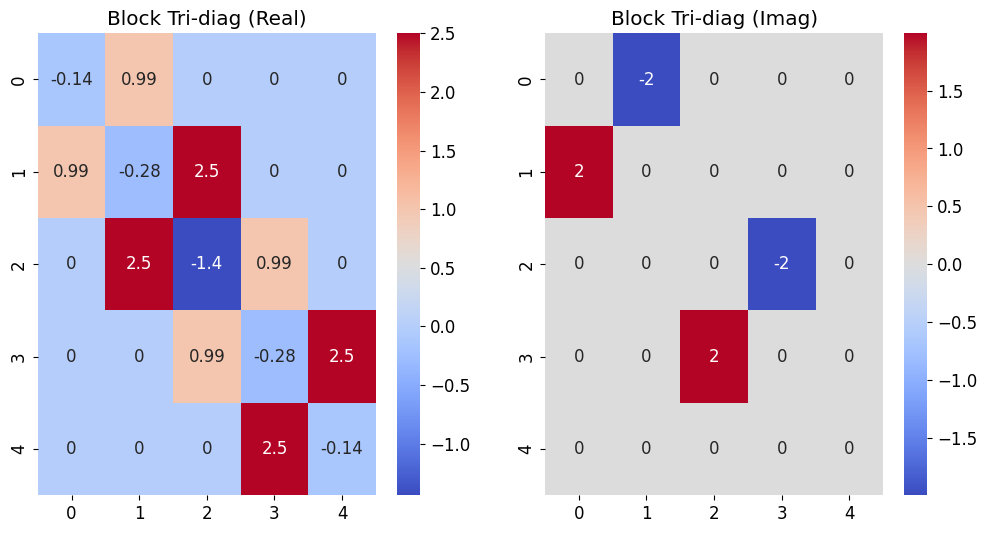

In [6]:
H_mode=np.zeros((N,N),dtype=complex)
zero_mat=np.zeros((N,N),dtype=complex)

beta = get_beta(gamma,M,6)
H_mode =U*np.diag(np.ones(N)) + gamma*np.diag(lst_01,-1)  + np.conjugate(beta)*np.diag(lst_10,-1) \
+ gamma*np.diag(lst_01,1) + beta*np.diag(lst_10,1) 

if(PrintFigures):
    #plt.figure(figsize = (8,16))
    fig, ax =plt.subplots(1,2,figsize = (12,6))
    sns.heatmap(np.real(H_mode),cmap='coolwarm',annot=True,ax=ax[0])    
    ax[0].set_title('Block Tri-diag (Real)')
    sns.heatmap(np.imag(H_mode),cmap='coolwarm',annot=True,ax=ax[1])      
    ax[1].set_title('Block Tri-diag (Imag)')

In [7]:
def BTD(M,M_inv,Aspectral,Gamma_comp):
    size = np.shape(M)[0]
    A=np.diag(M,0)
    B=np.diag(M,-1)
    C=np.diag(M,1)
#    M_inv = np.zeros(np.shape(M),dtype=complex)
    X_tilde=np.zeros(size,dtype=complex)
    Y_tilde=np.zeros(size,dtype=complex)
    X=np.zeros(size,dtype=complex)
    Y=np.zeros(size,dtype=complex)
    for n in range(1,size):
        Y_tilde[n] = (1./(A[n-1] - Y[n-1]))*C[n-1]
        Y[n] = B[n-1]*Y_tilde[n]

        
    print('Y')
    for n in range(1,size):
        print(Y_tilde[n])    
        
    for n in range(size-2,-1,-1):
        X_tilde[n] = (1./(A[n+1]-X[n+1]))*B[n]
        X[n] = C[n]*X_tilde[n]

    print('X')    
    for n in range(size-2,-1,-1):
        print(X_tilde[n])
        
    for i in range(0,size):
        M_inv[i][i] = 1./(A[i] - X[i] - Y[i])
        #print(M_inv[i][i])
    for n in range(0,size):
        for m in range(n,0,-1):
            #print(m-1,n)
            M_inv[m-1][n] = -Y_tilde[m]*M_inv[m][n]
        for m in range(n, size-1):
            #print(m+1,n)
            M_inv[m+1][n] = -X_tilde[m]*M_inv[m][n]

    Gamma = np.zeros(np.shape(M_inv),dtype=complex)
    Gamma[0][0] = Gamma_comp[0][0]
    Gamma[size-1][size-1] = Gamma_comp[1][0]    
    
    #sns.heatmap(np.real(Gamma),cmap='coolwarm',annot=True)    
    
    Aspectral = M_inv@Gamma@M_inv.conj().T
    #sns.heatmap(np.real(As),cmap='coolwarm',annot=True)    
    if(PrintFigures):
        fig, ax =plt.subplots(2,1,figsize = (12,12))
        sns.heatmap(np.real(Aspectral),cmap='coolwarm',annot=True,ax=ax[0])  
        ax[0].set_title('Python (Real)')
        sns.heatmap(np.imag(Aspectral),cmap='coolwarm',annot=True,ax=ax[1])  
        ax[1].set_title('Python (Imag)')
#     python_inverse=inv(H_mode)
#     if(PrintFigures):
#         #plt.figure(figsize = (12,6))
#         fig, ax =plt.subplots(2,2,figsize = (12,12))
#         sns.heatmap(np.real(M_inv),cmap='coolwarm',annot=True,ax=ax[0][0],label='hey')    
#         ax[0][0].set_title('Block Tri-diag (Real)')
#         sns.heatmap(np.imag(M_inv),cmap='coolwarm',annot=True,ax=ax[1][0])      
#         ax[1][0].set_title('Block Tri-diag (Imag)')

#         sns.heatmap(np.real(python_inverse),cmap='coolwarm',annot=True,ax=ax[0][1])  
#         ax[0][1].set_title('Python (Real)')
#         sns.heatmap(np.imag(python_inverse),cmap='coolwarm',annot=True,ax=ax[1][1])  
#         ax[1][1].set_title('Python (Imag)')


Y
(-6.934047098165423+13.925443799852356j)
(0.07270006155892798+0j)
(-0.6126297456130004+1.230326383982712j)
(0.8990284659626109+0j)
X
(-17.450054113884637-0j)
(0.022919935610930114+0.04602943572891025j)
(-1.608331958301791-0j)
(0.26572792282549745+0.5336536084874586j)


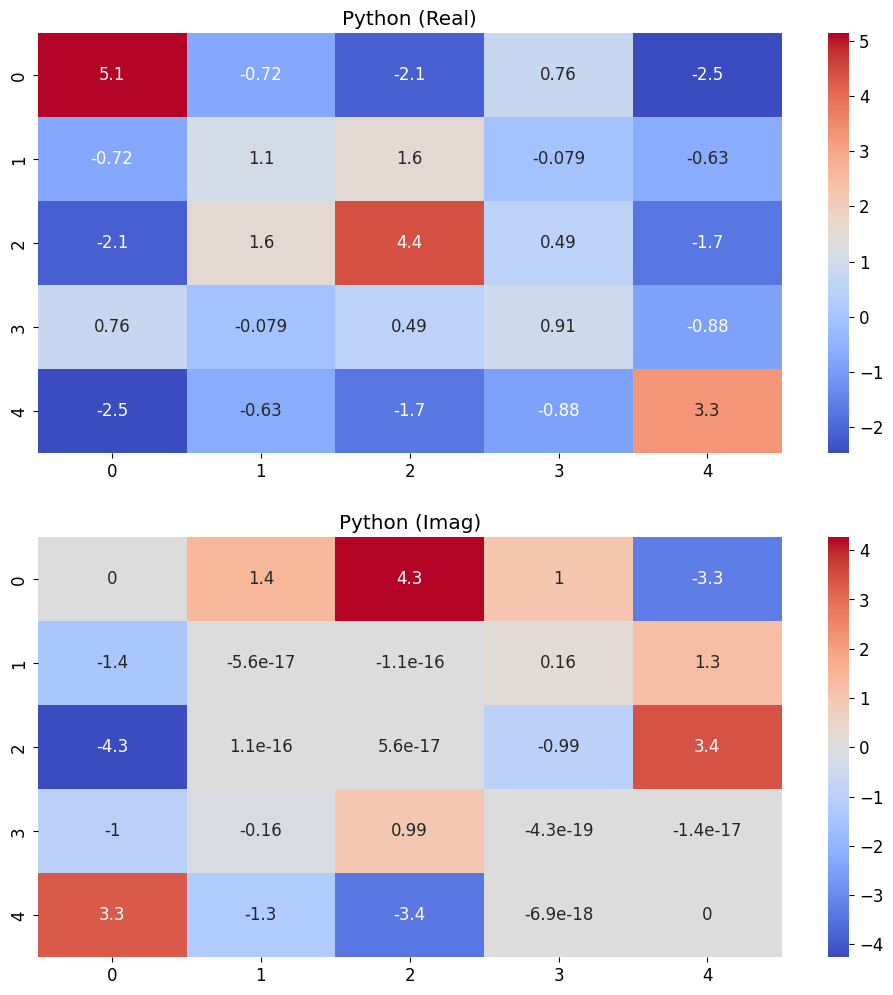

In [8]:
python_inverse=inv(H_mode)
G = np.zeros(np.shape(H_mode),dtype=complex)
As = np.zeros(np.shape(H_mode),dtype=complex)


num_contacts = 2
num_EnPts=1
Sigma_comp = np.zeros((num_contacts,1),dtype=complex)
for c in range(0,num_contacts):
    for e in range(0,num_EnPts):
        Sigma_comp[c][e] = 640.5 + 1j*(-3.1977)
Gamma_comp = np.zeros((num_contacts,1),dtype=complex)
for c in range(0,num_contacts):
    for e in range(0,num_EnPts):
        Gamma_comp[c][e] = 1j*(Sigma_comp[c][e]  - np.conjugate(Sigma_comp[c][e] ))
        
BTD(H_mode,G,As,Gamma_comp)

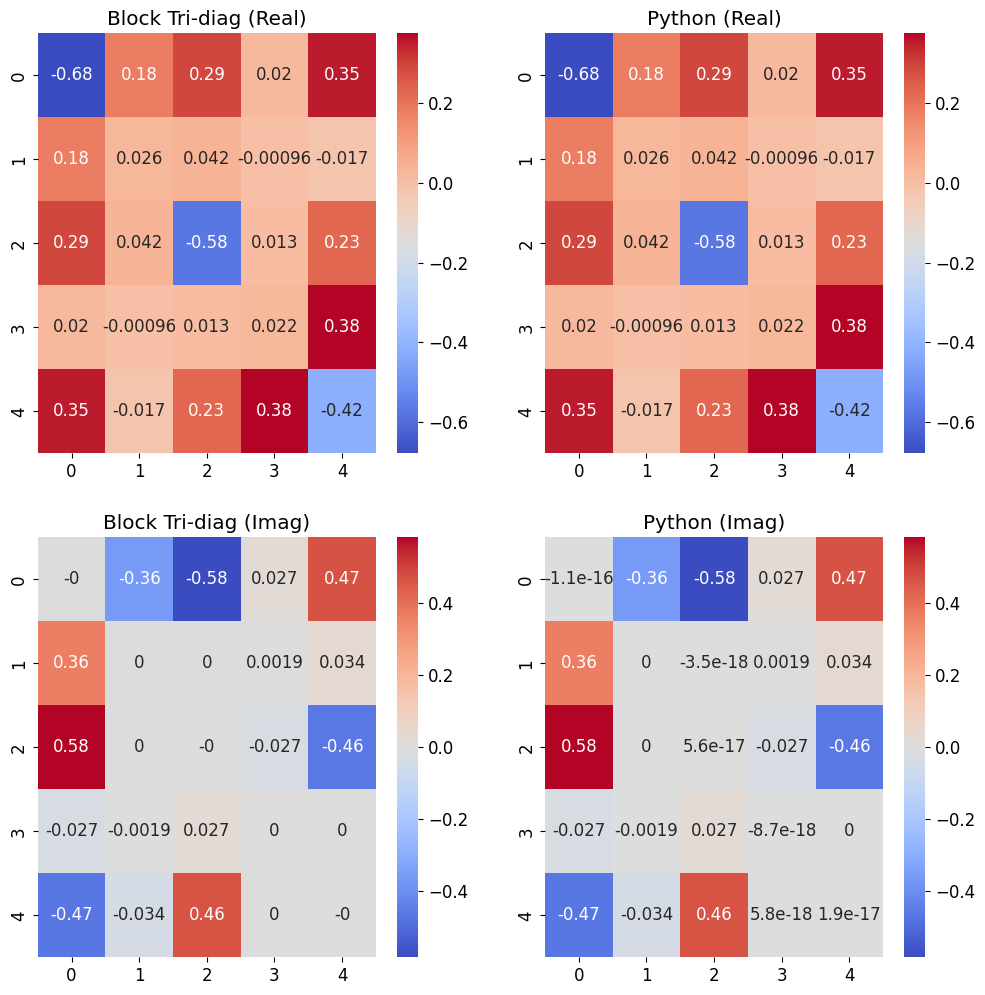

In [39]:
if(PrintFigures):
    #plt.figure(figsize = (12,6))
    fig, ax =plt.subplots(2,2,figsize = (12,12))
    sns.heatmap(np.real(G),cmap='coolwarm',annot=True,ax=ax[0][0],label='hey')    
    ax[0][0].set_title('Block Tri-diag (Real)')
    sns.heatmap(np.imag(G),cmap='coolwarm',annot=True,ax=ax[1][0])      
    ax[1][0].set_title('Block Tri-diag (Imag)')

    sns.heatmap(np.real(python_inverse),cmap='coolwarm',annot=True,ax=ax[0][1])  
    ax[0][1].set_title('Python (Real)')
    sns.heatmap(np.imag(python_inverse),cmap='coolwarm',annot=True,ax=ax[1][1])  
    ax[1][1].set_title('Python (Imag)')

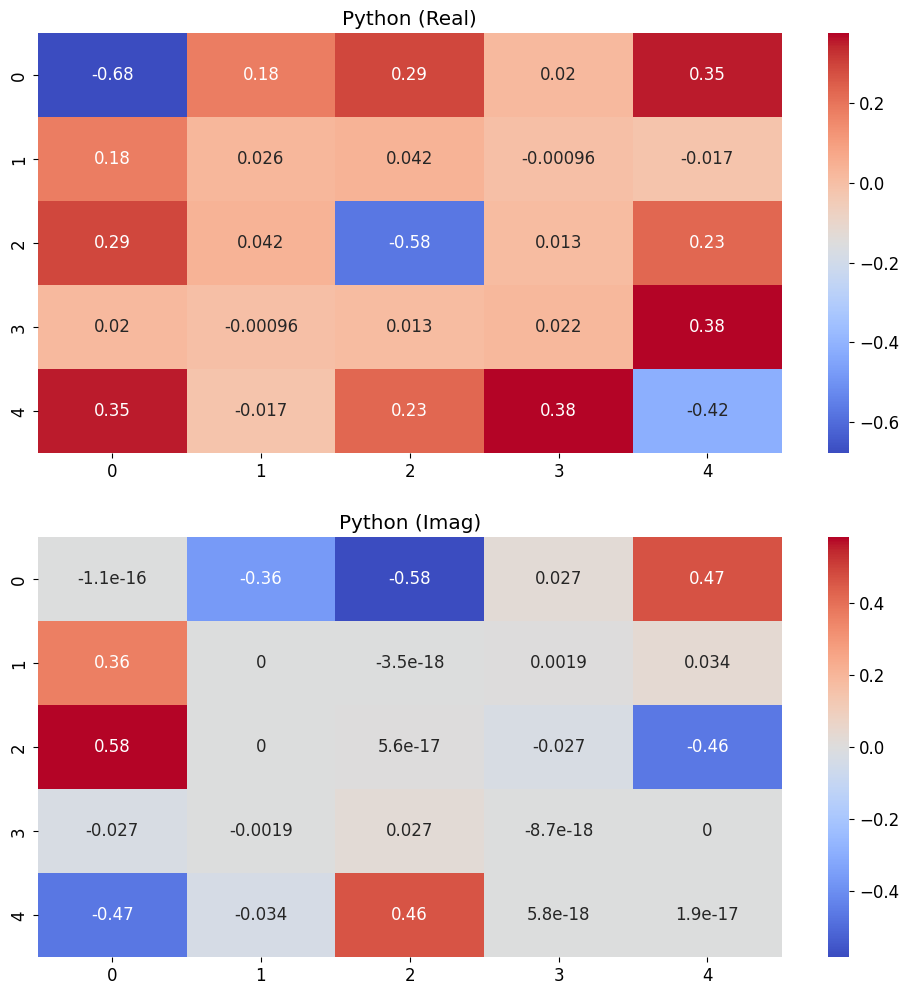

In [40]:
if(PrintFigures):
    #plt.figure(figsize = (12,6))
    fig, ax =plt.subplots(2,1,figsize = (12,12))
    sns.heatmap(np.real(python_inverse),cmap='coolwarm',annot=True,ax=ax[0])  
    ax[0].set_title('Python (Real)')
    sns.heatmap(np.imag(python_inverse),cmap='coolwarm',annot=True,ax=ax[1])  
    ax[1].set_title('Python (Imag)')

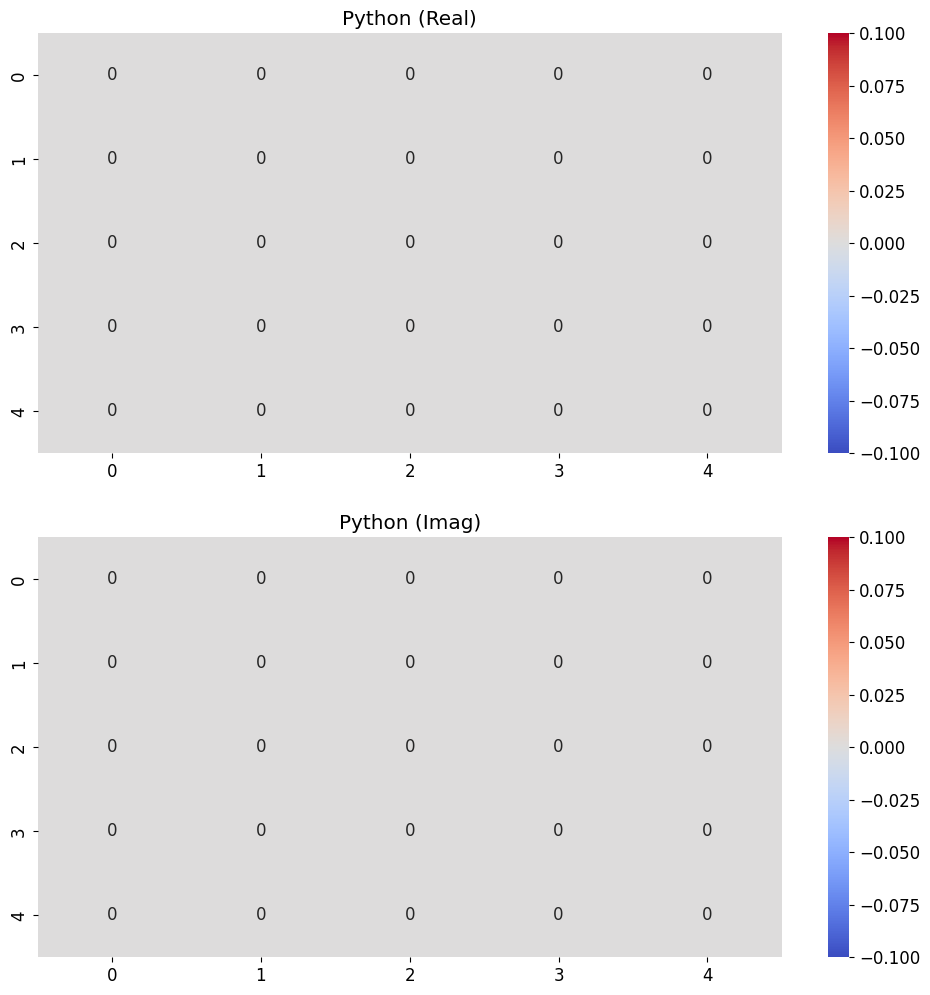

In [41]:
if(PrintFigures):
    #plt.figure(figsize = (12,6))
    fig, ax =plt.subplots(2,1,figsize = (12,12))
    sns.heatmap(np.real(As),cmap='coolwarm',annot=True,ax=ax[0])  
    ax[0].set_title('Python (Real)')
    sns.heatmap(np.imag(As),cmap='coolwarm',annot=True,ax=ax[1])  
    ax[1].set_title('Python (Imag)')

In [338]:
import numpy.polynomial.legendre as GL
def nf(E,kT=0.025,eta=None): 
    """ The Fermi distribution """
    if eta is None:
        # Ensures that numpy does not do anything with complex numbers!
        return 1./( np.exp( E / kT ) + 1 )
    return 1./( np.exp( (E+1j*eta) / kT) + 1)

def maxis(axs,**kwargs):
    """ Shorthand for setting several parameters for the axis environment """
    if isinstance(axs,(list,np.ndarray)):
        for ax in axs: 
            maxis(ax,**kwargs)
        return
    tmp = kwargs.get('xlbl',None)
    if tmp: axs.set_xlabel(tmp)
    tmp = kwargs.get('ylbl',None)
    if tmp: axs.set_ylabel(tmp)
    tmp = kwargs.get('title',None)
    if tmp: axs.set_title(tmp)
    tmp = kwargs.get('xrng',None)
    if not tmp is None: axs.set_xlim(tmp)
    tmp = kwargs.get('yrng',None)
    if not tmp is None: axs.set_ylim(tmp)

In [385]:
k=8.617333262e-5 #eV/K
Temp=4*298 #K
kT = k*Temp
pikT= np.pi*kT
zplus = 1e-8

Ef=0
num_poles=2



# Ei0=1
# num_poles=int((Ei0-pikT)/(2.0*pikT)+1)
# print(npoles)

zeta = 2*num_poles*pikT
print('zeta',zeta)
eta = -20*kT
E_left = -4 #eV
E_right= -E_left
E_cent = 0.
R = 0.
zplus=1e-8


def Path2(zeta, eta, E_left,zplus, deg=41):
    
    E_center = (E_left**2 - zeta**2 - eta**2)/(2*(E_left - eta))
    R = E_center - E_left
    print('E_cent', E_center)
    print('radius, R',R)
    X_lst = []
    Y_lst = []
    theta1 = np.arcsin(zeta/R)
    theta2 = np.pi #2*np.pi-np.arcsin(zeta/R)
    print('theta1:',theta1, R*math.sin(theta1))
    
    # using np.leggauss() method 
    x,w = GL.leggauss(deg) 
    
    a_r=eta
    b_r=E_left
    a_i=zeta
    b_i=zplus
    
    theta = x*(theta2-theta1)/2. + (theta2 + theta1)/2
    t_r = E_center+R*np.cos(theta)
    t_i = zplus+R*np.sin(theta)
    
    return(E_center, R, t_r, t_i,w)

E_cent, R, path2_x, path2_y, path2_weight = Path2(zeta, eta, E_left,zplus,deg=8)

print(path2_x)
print(path2_y)
print(path2_weight)

def CircularArc(zeta, eta, E_left, zplus, N=100):
    
    E_center = (E_left**2 - zeta**2 - eta**2)/(2*(E_left - eta))
    
    R = E_center - E_left
    X_lst = []
    Y_lst = []
    theta1 = np.arcsin(zeta/R)
    theta2 = np.pi
    
    for n in range(0,N+1):
        X_lst.append(E_center+R*math.cos(theta1+((theta2-theta1)*n/N)))
        Y_lst.append(zplus+R*math.sin(theta1+((theta2-theta1)*n/N)))     
    return (X_lst,Y_lst)

circle_x, circle_y = CircularArc(zeta, eta, E_left,zplus, N=100)


def Path1(zeta,eta,E_right,deg=11):
    x,w = GL.leggauss(deg)     
    X_lst = []
    Y_lst = []
    for n in range(0,N+1):
        #X_lst.append(E_right + (eta - E_right)*n/N)
        X_lst.append((E_right - eta)*0.5*x + (E_right+eta)*0.5)
        Y_lst.append(zeta)
    return (X_lst, Y_lst,w)

path1_x, path1_y = PointsOnPath1(zeta,eta,E_right,N=21)


zeta 1.2908001534546212
E_cent -2.599004260167955
radius, R 1.400995739832045
theta1: 1.1715257759346154 1.2908001534546212
[-2.10526668 -2.32206973 -2.6943326  -3.15111768 -3.57071224 -3.84975427
 -3.9719925  -3.99892834]
[1.31111109 1.37335223 1.39774876 1.2876179  1.00924362 0.63120004
 0.27873351 0.05478713]
[0.10122854 0.22238103 0.31370665 0.36268378 0.36268378 0.31370665
 0.22238103 0.10122854]


[0.32270004 0.96810012 1.61350019 2.25890027 2.90430035 3.54970042]
1.2908001534546212


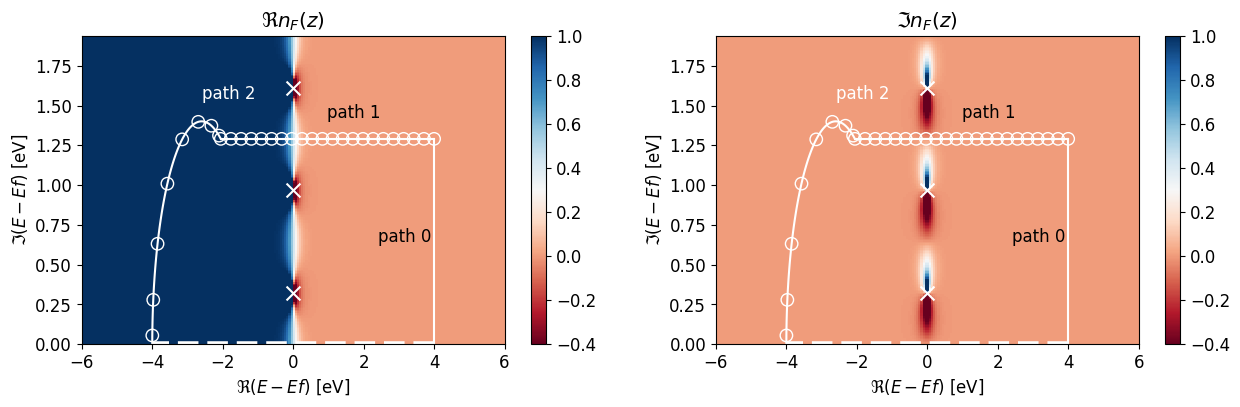

In [386]:
E_pts=200
E_min = E_left-2
E_max = -E_min
E=np.linspace(E_min,E_max,E_pts,dtype=complex)

E_complex_y_max = 1.5*zeta
E_complex = np.linspace(0, E_complex_y_max, E_pts)
# Setup the poles
poles = kT * np.pi * (2 * np.arange(int(E_complex_y_max/(pikT))) + 1)
print(poles)

# Calculate the Fermi function
nF = np.empty([len(E_complex), len(E)], np.complex128)
for i,e_i in enumerate(E_complex): 
    nF[i,:] = nf(E, eta=e_i, kT=kT)
    

fig, axs = plt.subplots(ncols=2, figsize=(15,4))
maxis(axs[0], title=r'$\Re n_F(z)$') ; maxis(axs[1], title=r'$\Im n_F(z)$')
maxis(axs, xlbl='$\Re (E-Ef)$ [eV]', xrng=[np.amin(E), np.amax(E)],
      ylbl='$\Im (E-Ef)$ [eV]', yrng=[0, np.amax(E_complex)])


L = zeta
print(L)

for i,data in enumerate([nF.real, nF.imag]):
    p = axs[i].pcolor(E, E_complex, data, cmap='RdBu', vmin=-0.4, vmax=1)
    fig.colorbar(p, ax=axs[i])
    axs[i].scatter(path2_x, path2_y, facecolors='none', edgecolors='w', s=80)
    axs[i].scatter(path1_x, path1_y, facecolors='none', edgecolors='w', s=80)
    axs[i].plot(circle_x, circle_y,color='w')
    axs[i].scatter(np.zeros(len(poles)), poles, marker="x", color='w', s=100)
    
    axs[i].text(E_right*0.6,(zeta/2),'path 0',color='k')
    axs[i].text((E_right+eta)/2.,1.1*zeta,'path 1',color='k')
    axs[i].text(E_cent,1.1*R,'path 2',color='w')
    
    axs[i].plot([E_right, eta], [zeta, zeta], 'w')
    axs[i].plot([E_right, E_left], [zplus,zplus], 'w--', lw=4)
    axs[i].plot([E_right, E_right],[zplus,zeta], 'w')

In [359]:
# from scipy import integrate
# a = 0.0
# b = np.pi/2
# f = lambda x: np.cos(x)

# # For comparison
# quad, quad_err = integrate.quad(f, a, b)
# print ('The QUADPACK solution: {0:.8} with error: {1:.8}'.format(quad, quad_err))

# import numpy.polynomial.legendre as GL
# deg=2

# # using np.leggauss() method 
# x,w = GL.leggauss(deg+1) 
# print(x)
# print(w)
# t = (x + 1)*(b - a)/2. + a
# print(t)
# gauss = sum(w * f(t)) * 0.5*(b - a)

# print ('Gauss-Legendre solution: {0:.8}'.format(gauss))

# print ('Difference between Gauss-Legendre:', abs(gauss - quad))



In [390]:
x,w = GL.leggauss(100) 
print(x)

[-0.99971373 -0.99849195 -0.99629513 -0.99312494 -0.9889844  -0.98387754
 -0.97780936 -0.97078578 -0.96281365 -0.95390078 -0.94405587 -0.93328854
 -0.9216093  -0.90902957 -0.89556164 -0.88121868 -0.86601469 -0.84996453
 -0.83308388 -0.81538924 -0.79689789 -0.77762791 -0.75759812 -0.73682809
 -0.71533812 -0.6931492  -0.67028302 -0.64676191 -0.62260886 -0.59784747
 -0.57250193 -0.54659701 -0.52015802 -0.49321079 -0.46578165 -0.4378974
 -0.40958529 -0.38087298 -0.35178853 -0.32236034 -0.29261719 -0.26258812
 -0.23230248 -0.20178986 -0.17108008 -0.14020314 -0.1091892  -0.07806858
 -0.04687168 -0.01562898  0.01562898  0.04687168  0.07806858  0.1091892
  0.14020314  0.17108008  0.20178986  0.23230248  0.26258812  0.29261719
  0.32236034  0.35178853  0.38087298  0.40958529  0.4378974   0.46578165
  0.49321079  0.52015802  0.54659701  0.57250193  0.59784747  0.62260886
  0.64676191  0.67028302  0.6931492   0.71533812  0.73682809  0.75759812
  0.77762791  0.79689789  0.81538924  0.83308388  0.8